**0. Import & parse CSV data**

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
#from matplotlib.pylab import plot, legend
import pandas as pd

In [6]:
# read trends.csv with pandas. The first line is the header: 
## week_start,week_end,textbooks,spring_break,kayak,skiing,global_warming
## 2004-01-04,2004-01-10,65,36,17,85,13
## 2004-01-11,2004-01-17,79,40,18,84,18


# Giving it index_col=0 uses the week_start as the index 
# and parse_dates=True parses them as a date.
df = pd.read_csv('trends.csv',index_col=0,parse_dates=True)

Here we read in the csv file, specifying that the first column (which was week_start) should be the index column. By setting parse_dates=True, we told pandas to parse the date and store each index as a Timestamp object.  

The first line in the csv file was interpreted as the header, and these strings were stored as the column names. We can see the names and data types of each column with df.dtypes:

In [4]:
df.dtypes

week_end          object
textbooks          int64
spring_break       int64
kayak              int64
skiing             int64
global_warming     int64
dtype: object

Let's take a look at the first few entries of the pandas dataframe to see how it looks:

In [7]:
df.head()

,week_end,textbooks,spring_break,kayak,skiing,global_warming
week_start,,,,,,
2004-01-04,2004-01-10,44,30,23,92,14
2004-01-11,2004-01-17,52,34,25,91,21
2004-01-18,2004-01-24,39,34,24,85,19
2004-01-25,2004-01-31,29,37,24,86,18
2004-02-01,2004-02-07,22,34,22,73,20


NB: In the table above it looks like the first row is "week_start" followed by a bunch of blank entries, but in fact this is just showing that the label for the indices is called "week_start". We can grab the first row of the data frame to verify what it contains:

In [8]:
print(df.iloc[0])

week_end          2004-01-10
textbooks                 44
spring_break              30
kayak                     23
skiing                    92
global_warming            14
Name: 2004-01-04 00:00:00, dtype: object


Note that iloc indexes by *integer position* whereas loc will index by the actual index key, e.g.

In [9]:
print(df.loc['2004-01-04'])

week_end          2004-01-10
textbooks                 44
spring_break              30
kayak                     23
skiing                    92
global_warming            14
Name: 2004-01-04 00:00:00, dtype: object


I. Plot trends in single frame, with legend

We can plot each column of interest against the index (which in this case is week_start) one at a time:

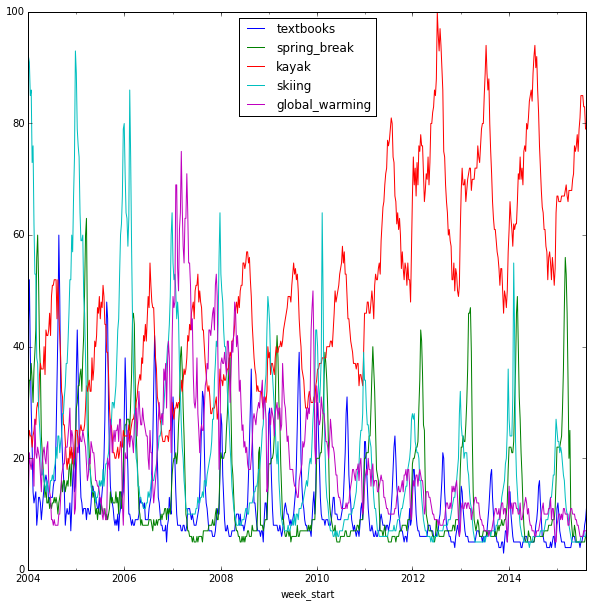

In [11]:
df.plot(figsize=(10,10))
#df.textbooks.plot()
#df.skiing.plot()
#df.kayak.plot()
# if we want to add a legend, must import legend from matplotlib
#legend()

Or we could slice the columns of interest with df.loc and plot them all in one line. Pandas will even do the legend for you!

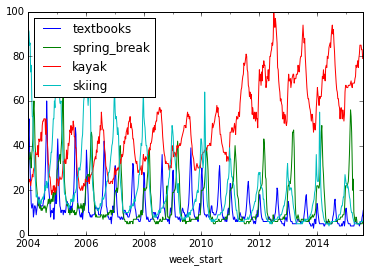

In [12]:
df.loc[:,['textbooks','spring_break','kayak','skiing']].plot()

Or we could slice the columns of interest by integer position using df.iloc

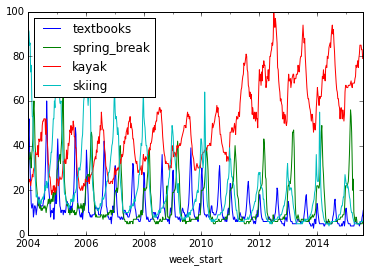

In [13]:
df.iloc[:,1:5].plot()

In [14]:
# Let’s look at some summary statistics:
df.describe()

,textbooks,spring_break,kayak,skiing,global_warming
count,607.000000,607.000000,607.000000,607.000000,607.000000
mean,11.448105,14.660626,49.100494,20.594728,20.074135
std,7.988039,11.274851,18.674159,17.394107,12.030878
min,3.000000,5.000000,18.000000,4.000000,5.000000
25%,7.000000,7.000000,34.000000,8.000000,11.000000
50%,9.000000,9.000000,47.000000,15.000000,17.000000
75%,13.000000,20.000000,64.000000,26.000000,26.000000
max,60.000000,63.000000,100.000000,93.000000,75.000000


**II. Determine maxima and minima of each trend term**

Determine in which week of each year (for all five search trends including "global warming") that search reached its peak and its minimum.

We can query the pandas data frame to return to us a slice of the data frame where a year is a particular value

In [20]:
sub_df = df[df.index.year == 2015]

In [21]:
# look at the first few values of the data frame to see that it contains just 2006 values
print(sub_df.head())

              week_end  textbooks  spring_break  kayak  skiing  global_warming
week_start                                                                    
2015-01-04  2015-01-10         11            22     67      25               8
2015-01-11  2015-01-17         12            22     67      23               9
2015-01-18  2015-01-24         10            22     66      23              10
2015-01-25  2015-01-31          7            22     66      21              10
2015-02-01  2015-02-07          6            23     66      22               9


In [22]:
# we could find where there was a maximum value in a series with idxmax
sub_df.kayak.idxmax()

Timestamp('2015-07-05 00:00:00')

In [23]:
# or we could use boolean indexing
sub_df.loc[sub_df.kayak == sub_df.kayak.max()].index

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19'], dtype='datetime64[ns]', name='week_start', freq=None, tz=None)

Find the week in each year that each trend was maximum and minimum. Let's loop through each key of interest and each year, and print out the max and min values of each column in that year.

In [24]:
keylist = ['textbooks','spring_break','kayak','skiing','global_warming']

In [25]:
for key in keylist:
    print('Searches for "' + key + '":')
    for yr in range(2004,2015):
        # our indices are timestamp objects which have nice properties such as being able to grab the year, month, day, week, etc
        sub_df = df.loc[df.index.year == yr]
        trend = sub_df[key]
        peak_start_timestamp = sub_df.loc[trend == max(trend)].index[0] # taking the first element in case there are multiple with the max value
        peak_start = str(peak_start_timestamp.month) + '-' + str(peak_start_timestamp.day)
        peak_week = str(peak_start_timestamp.week) 
        peak_end = sub_df.loc[trend == max(trend)].week_end.iloc[-1] # taking the first element in case there are multiple with the max value
        peak_end = peak_end[5:].lstrip('0') # take only the date, not the year
        
        # similar process for minimum values
        min_start_timestamp = sub_df.loc[trend == min(trend)].index[0]
        min_start = str(min_start_timestamp.month) + '-' + str(min_start_timestamp.day)
        min_week = str(min_start_timestamp.week)
        min_end = sub_df.loc[trend == min(trend)].week_end.iloc[0]
        min_end = min_end[5:].lstrip('0') 
        
        print('  in ' + str(yr) + ' were highest from ' + peak_start + ' to ' + peak_end + " (Week " + peak_week + ")")
        print('          were lowest from ' +  min_start + ' to ' + min_end + " (Week " + min_week + ")")

Searches for "textbooks":
  in 2004 were highest from 8-22 to 8-28 (Week 34)
          were lowest from 11-21 to 11-27 (Week 47)
  in 2005 were highest from 8-21 to 8-27 (Week 33)
          were lowest from 11-20 to 11-26 (Week 46)
  in 2006 were highest from 8-20 to 8-26 (Week 33)
          were lowest from 11-19 to 11-25 (Week 46)
  in 2007 were highest from 8-19 to 8-25 (Week 33)
          were lowest from 11-4 to 11-10 (Week 44)
  in 2008 were highest from 8-24 to 8-30 (Week 34)
          were lowest from 11-23 to 11-29 (Week 47)
  in 2009 were highest from 8-23 to 8-29 (Week 34)
          were lowest from 4-12 to 4-18 (Week 15)
  in 2010 were highest from 8-22 to 8-28 (Week 33)
          were lowest from 10-31 to 11-06 (Week 43)
  in 2011 were highest from 8-21 to 8-27 (Week 33)
          were lowest from 10-30 to 11-05 (Week 43)
  in 2012 were highest from 8-19 to 8-25 (Week 33)
          were lowest from 11-18 to 11-24 (Week 46)
  in 2013 were highest from 8-25 to 8-31 (Week 34)

For each year, list week numbers corresponding to maximum and minimum search values

**III. Study scatter about median values**

Let's find which search value has the largest scatter over time. 
Q: Is it true that $\sigma(A) > \sigma(B) \Rightarrow \sigma_\textrm{median}(A) > \sigma_\textrm{median}(B)$?

In [26]:
def std_median(datums):
    return np.sqrt( np.sum( (datums - datums.median())**2 ) * 1.0/ len(datums) )

In [27]:
print(df.spring_break.std(), std_median(df.spring_break))
print(df.textbooks.std(), std_median(df.textbooks))
print(df.skiing.std(), std_median(df.skiing))
print(df.kayak.std(), std_median(df.kayak))
print(df.global_warming.std(), std_median(df.global_warming))

11.274850731312645 12.607756301
7.988039256111653 8.34846511951
17.394106923332135 18.2580802901
18.67415882111217 18.7766285377
12.03087775980996 12.4078149365


We see that searches for kayak have the highest scatter, whereas those for textbooks remain more stable

**IV. Correlation between trends**

We can use cross-correlation to find the time delay between two time-series. The maximum of the cross-correlation function gives the time when the two signals are best aligned (in other words, the lag between the two signals).

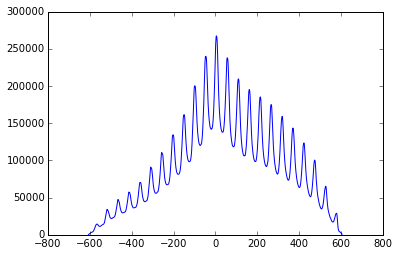

In [28]:
result = np.correlate(df['spring_break'],df['skiing'], mode='full')
gap = np.arange(result.size) - result.size/2
plot(gap,result)

We can use the numpy function argmax to get the index at which this value is maximum
(note for pandas expert - result appears still to be a pandas object and maintains attributes such as idxmax, but they don't work?)

In [30]:
print(gap[result.argmax()]) # Find the x value corresponding to the maximum y value

5.5


Let's do the same exercise to find the lag between global warming and skiing searches

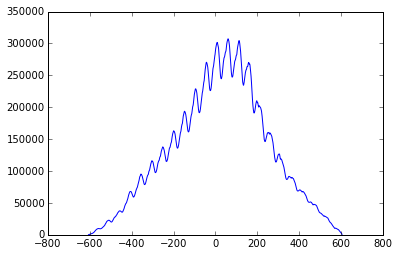

In [31]:
result2 = np.correlate(df.global_warming,df.skiing, mode='full')
gap2 = np.arange(result2.size) - result2.size/2
plot(gap2,result2)

In [32]:
print(gap2[result2.argmax()])  # Find the x value corresponding to the maximum y value

60.5


In [33]:
mid_peak_min = len(gap2)/2 - 26
mid_peak_max = len(gap2)/2 + 26
print(gap2[mid_peak_min:mid_peak_max][result2[mid_peak_min:mid_peak_max].argmax()])

8.5
